In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [138]:
data = pd.read_csv(r"C:\Users\anasw\Downloads\housing_data_set.csv")

df = pd.DataFrame(data)

In [139]:
df.shape

print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 20640 rows and 13 columns.


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20640 non-null  int64  
 1   longitude           20640 non-null  float64
 2   latitude            20640 non-null  float64
 3   housing_median_age  20640 non-null  int64  
 4   total_rooms         20637 non-null  float64
 5   total_bedrooms      20433 non-null  float64
 6   population          20640 non-null  int64  
 7   households          20640 non-null  object 
 8   median_income       20636 non-null  float64
 9   median_house_value  20640 non-null  int64  
 10  ocean_proximity     20630 non-null  object 
 11  Unnamed: 11         0 non-null      float64
 12  Unnamed: 12         0 non-null      float64
dtypes: float64(7), int64(4), object(2)
memory usage: 2.0+ MB


In [141]:
df[df["households"] == '23-05-2011']



,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Unnamed: 11,Unnamed: 12
126,127,-122.22,37.84,50,2935.0,473.0,1031,23-05-2011,7.800,295500,NEAR BAY,NaN,NaN
20409,20410,-118.86,34.20,32,2399.0,384.0,1199,23-05-2011,4.425,264900,<1H OCEAN,NaN,NaN


In [142]:
def fix_column_value(value):
    try:
        # Try to convert to integer
        return int(value)
    except ValueError:
        # If conversion fails, return None
        return None 
    

df["households"] = df["households"].apply(fix_column_value)

columns_check_int64 = df.select_dtypes(include='int64').columns

for column in columns_check_int64:
    df[column].apply(fix_column_value)

In [143]:
def fix_column_value_float(value):
    try:
        # Try to convert to integer
        return float(value)
    except ValueError:
        # If conversion fails, return None
        return None 


columns_check = df.select_dtypes(include='float64').columns

for column in columns_check:
    df[column].apply(fix_column_value_float)

In [144]:
df.isnull().sum()

id                        0
longitude                 0
latitude                  0
housing_median_age        0
total_rooms               3
total_bedrooms          207
population                0
households                3
median_income             4
median_house_value        0
ocean_proximity          10
Unnamed: 11           20640
Unnamed: 12           20640
dtype: int64

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20640 non-null  int64  
 1   longitude           20640 non-null  float64
 2   latitude            20640 non-null  float64
 3   housing_median_age  20640 non-null  int64  
 4   total_rooms         20637 non-null  float64
 5   total_bedrooms      20433 non-null  float64
 6   population          20640 non-null  int64  
 7   households          20637 non-null  float64
 8   median_income       20636 non-null  float64
 9   median_house_value  20640 non-null  int64  
 10  ocean_proximity     20630 non-null  object 
 11  Unnamed: 11         0 non-null      float64
 12  Unnamed: 12         0 non-null      float64
dtypes: float64(8), int64(4), object(1)
memory usage: 2.0+ MB


In [146]:
df["ocean_proximity"] = df["ocean_proximity"].astype("category")

In [147]:
df["total_rooms"] = df["total_rooms"].fillna(df["total_rooms"].abs().mean())
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].abs().mean())

df["median_income"] = df["median_income"].fillna(df["median_income"].mean())
df["households"] = df["households"].fillna(df["households"].abs().mean())


df["ocean_proximity"] = df["ocean_proximity"].fillna(df["ocean_proximity"].mode()[0])



In [148]:
df = df.drop( columns=['Unnamed: 11' , 'Unnamed: 12'])

In [149]:
select_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize an empty Series to store outlier flags
column_outliers = pd.Series(False, index=df.index)

for column in select_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    # Update the outlier flags for this column
    column_outliers |= (df[column] > upper_limit) | (df[column] < lower_limit)

# Filter out rows without outliers
df2 = df[~column_outliers]


In [150]:
df2.describe()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17609.000000,17609.000000,17609.000000,17609.000000,17609.000000,17609.000000,17609.000000,17609.000000,17609.000000,17609.000000
mean,10263.142541,-119.604072,35.695910,29.493611,2144.725928,446.260455,1197.657164,416.755218,3.875767,187365.057414
std,6034.181438,2.004551,2.166407,12.208499,1090.015835,220.025236,602.750044,205.333660,1.443685,93768.506393
min,3.000000,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.799900,15299.000000
25%,4974.000000,-121.780000,33.940000,19.000000,1375.000000,288.000000,766.000000,271.000000,2.791900,113200.000000
50%,10195.000000,-118.600000,34.300000,30.000000,1978.000000,414.000000,1111.000000,387.000000,3.690600,170300.000000
75%,15493.000000,-118.030000,37.740000,38.000000,2784.000000,576.000000,1560.000000,540.000000,4.787500,242000.000000
max,20640.000000,-114.490000,41.950000,52.000000,5688.000000,1161.000000,3131.000000,1092.000000,8.311300,482500.000000


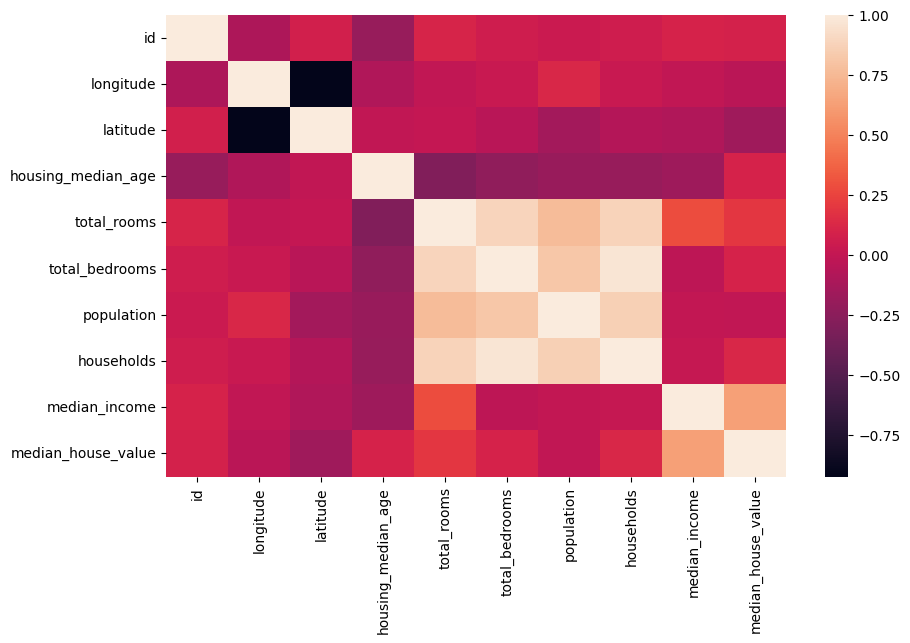

In [151]:
select_cols = df2.select_dtypes(include = ['int64' , 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(select_cols.corr())
plt.plot()
plt.show()

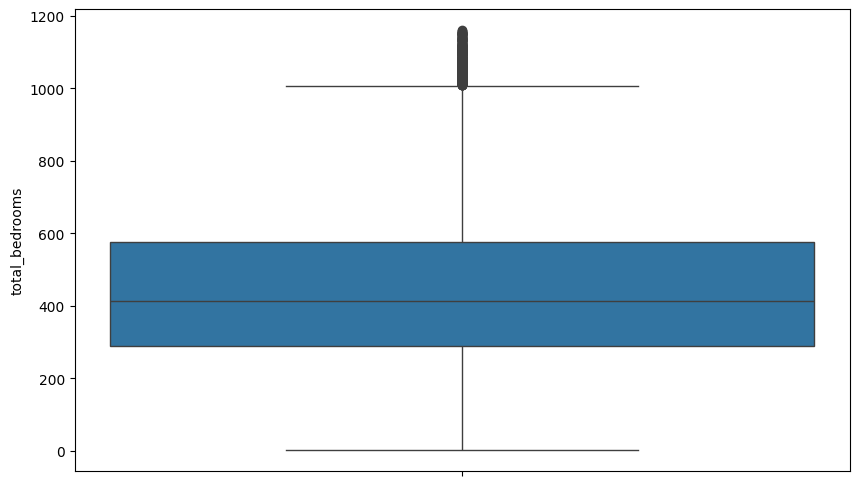

In [152]:
plt.figure(figsize=(10,6))
sns.boxplot(df2["total_bedrooms"])
plt.plot()
plt.show()

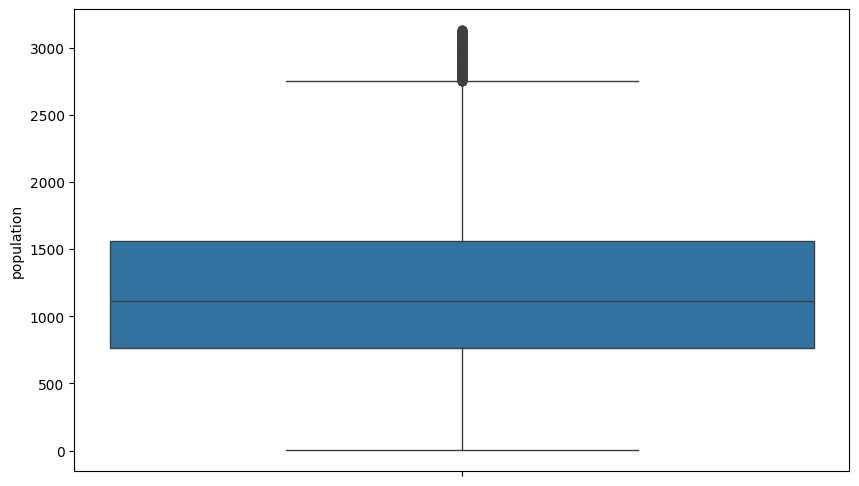

In [153]:
plt.figure(figsize=(10,6))
sns.boxplot(df2["population"])
plt.plot()
plt.show()

In [134]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [173]:
X = df2.drop(columns=["median_house_value"])
y = df2["median_house_value"]

X = pd.get_dummies(X,drop_first = True ,dtype=int)


In [174]:
X

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,3,-122.24,37.85,52,1467.0,190.0,496,177.0,7.5574,0,0,1,0
3,4,-122.25,37.85,52,1274.0,235.0,558,219.0,5.9431,0,0,1,0
4,5,-122.25,37.85,52,1627.0,280.0,565,259.0,4.1462,0,0,1,0
5,6,-122.25,37.85,52,919.0,213.0,413,193.0,4.3368,0,0,1,0
6,7,-122.25,37.84,52,2535.0,489.0,1094,514.0,3.9591,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20636,-121.09,39.48,25,1665.0,374.0,845,330.0,1.8603,1,0,0,0
20636,20637,-121.21,39.49,18,697.0,150.0,356,114.0,2.8568,1,0,0,0
20637,20638,-121.22,39.43,17,2254.0,485.0,1007,433.0,2.0000,1,0,0,0
20638,20639,-121.32,39.43,18,1860.0,409.0,741,349.0,2.1672,1,0,0,0


In [179]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=1.0) 
model.fit(X, y)

# Get the feature importances (coefficients)
feature_importances = model.coef_

# # Print the feature importances along with feature names
for feature_name, importance in zip(X.columns, feature_importances):
    print(f"{feature_name}: {importance}")

id: 0.7244112957546506
longitude: -23073.8456217755
latitude: -22140.379752788787
housing_median_age: 939.9079764671949
total_rooms: -14.04904939029942
total_bedrooms: 140.59863558194343
population: -60.67807087812547
households: 117.10021839734871
median_income: 39327.38305486517
ocean_proximity_INLAND: -37392.89625757378
ocean_proximity_ISLAND: 155088.82502167101
ocean_proximity_NEAR BAY: -6385.445260114769
ocean_proximity_NEAR OCEAN: -4964.186219166066


In [181]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Select numerical attributes
num_attributes = X.select_dtypes(include=['int64', 'float64']).columns

# Initialize and fit StandardScaler to the training data
scaler = StandardScaler()
x_train[num_attributes] = scaler.fit_transform(x_train[num_attributes])
x_test[num_attributes] = scaler.transform(x_test[num_attributes])

# Initialize and fit the linear regression model to the training data
model = LinearRegression() 
model.fit(x_train, y_train)


# Make predictions on the test set
y_test_pred = model.predict(x_test)

# Evaluate the model's performance on the test set
print("Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared:", r2_score(y_test, y_test_pred))

Mean Absolute Error: 43275.51161396644
Mean Squared Error: 3392530549.1332197
Root Mean Squared Error: 58245.43371916137
R-squared: 0.6250151852195112


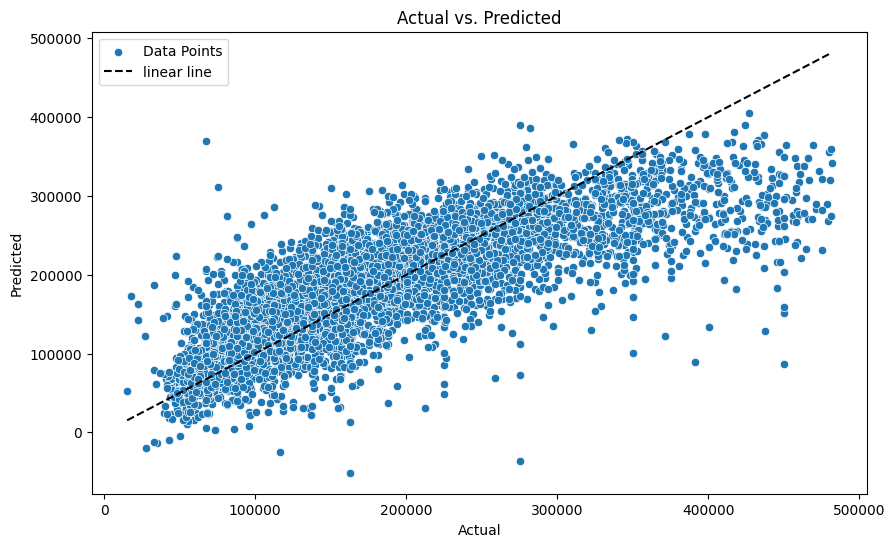

In [182]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, label='Data Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label = 'linear line')  # Adding a line
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [183]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Select numerical attributes
num_attributes = X.select_dtypes(include=['int64', 'float64']).columns

# Initialize and fit StandardScaler to the training data
scaler = StandardScaler()
x_train[num_attributes] = scaler.fit_transform(x_train[num_attributes])
x_test[num_attributes] = scaler.transform(x_test[num_attributes])

# Initialize and fit the linear regression model to the training data
lasso_model = Ridge(alpha=1.0)  # You can adjust alpha (regularization strength) as needed
lasso_model.fit(x_train, y_train)


# Make predictions on the test set
y_test_pred = model.predict(x_test)

# Evaluate the model's performance on the test set
print("Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared:", r2_score(y_test, y_test_pred))

Mean Absolute Error: 43275.51161396644
Mean Squared Error: 3392530549.1332197
Root Mean Squared Error: 58245.43371916137
R-squared: 0.6250151852195112
